# 光谱识别示例
本文件用于说明如何使用shining进行光谱识别
由于多进程原因，在jupyter中运行可能有问题，本文件以讲解使用方法为主，实际使用时请参考example1.py文件，cmd、pycharm中可以顺利运行，由于Spyder对多进程的支持问题，使用Spyder运行可能会出现某些print无法打印问题。

In [1]:
from shiningspectrum import pretreatment

from shiningspectrum import database

import os
import matplotlib.pyplot as plt
import numpy as np


from shiningspectrum import shiningnoodles
import time

## 制作待测物光谱

待测物光谱使用氯仿(CAS:67-66-3)和甲苯(CAS:108-88-3)数据合成。并绘制光谱图像。待测物list_spectrum_compound是一个二维列表，x=[1,2,3,...],y=[1,2,3,...],list_spectrum_compound=[x,y] 样式。

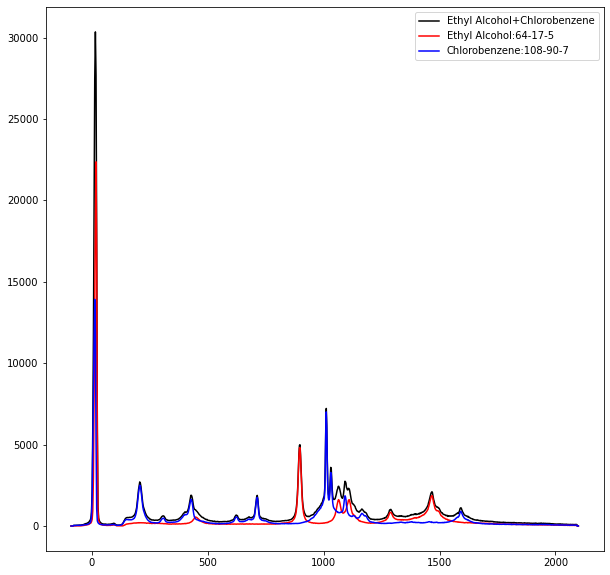

In [2]:
#time_start = time.time()


data_path=os.getcwd()+ "/Prepare incoming data"

#name_f1="氯仿"
#name_f2="甲苯"

#name_f1="苯酚"
#name_f2="氯苯"

name_f1="乙醇"
name_f2="氯苯"

file_data1 = database.read_file(data_path, name_f1+".txt")#67-66-3
file_data2 = database.read_file(data_path, name_f2+".txt")#108-88-3

list_spectrum1 = database.data_extraction(file_data1)
list_spectrum2 = database.data_extraction(file_data2)


abstract_1 = database.data_extraction_abstract(file_data1)
abstract_2 = database.data_extraction_abstract(file_data2)
CAS_1 = abstract_1["CAS"]
CAS_2 = abstract_2["#CAS"]

name_1 = abstract_1["Material scientific name"]
name_2 = abstract_2["#Material scientific name"]

list_spectrum_compound = [list_spectrum1[0],list(np.array(list_spectrum1[1])+np.array(list_spectrum2[1]))]

plt.figure(figsize=(10,10))
plt.plot(list_spectrum_compound[0],list_spectrum_compound[1],"k-",label=name_1+"+"+name_2)

plt.plot(list_spectrum1[0],list_spectrum1[1],"r-",label=name_1+":"+CAS_1)

plt.plot(list_spectrum2[0],list_spectrum2[1],"b-",label=name_2+":"+CAS_2)
plt.legend()
#plt.show()




## 从数据库读取用于比对的数据

数据库目前包含苯酚、甲苯、氯苯、氯苯、氯仿、乙醇六种物质，都是我们实验室自己测的，如需使用自定义数据库，请参考"初始化数据库并导入数据.ipynb"文件。

In [3]:
# 读取光谱数据库
all_spectrum = database.read_all("raman_database")

# 将光谱数据格式转为noodles可以识别的数据格式
list_of_compounds = shiningnoodles.shining2noodles(all_spectrum)


## 转换待测物数据格式

shining的光谱识别部分重构于raman-noodles，重写了寻峰算法，加入了多进程处理，继承了比对算法。为了降低工作量，进行光谱识别时会将数据格式转换为noodles可以使用的数据格式。

In [4]:
#1.1
#unknown_x, unknown_y = shiningnoodles.combine_spectra(list_of_compounds[1], list_of_compounds[3])#noodles会对数据进行插值，减慢运行速度。
#__
#1.2
unknown_x = np.asarray(list_spectrum_compound[0])
unknown_y = np.asarray(list_spectrum_compound[1])
#__
# 去除光谱背景光。如需进行去噪，可以参考“数据的预处理.ipynb”文件。

x_data, y_data, y_base = pretreatment.autbaseline(unknown_x, unknown_y, deg=4, max_it=200,tol=None)#shining重构
unknow_compound = {"title":"unkonw","x":x_data,"y":y_data}

## 光谱识别
shining中的光谱识别可以使用一个component_testing类来实现。

In [5]:
#调用component_testing类，此步可对一些参数进行定义，也可以使用默认参数，详情可以使用help(shiningnoodles.component_testing)查看可自定义的参数。
A = shiningnoodles.component_testing(peak_algorithm="shining")

#print("准备启动多进程")
#开始识别
unkonw_peak_center, unknown_peak_assignments, percentages = A.peak_assignment(unknow_compound, list_of_compounds)
#jupyter中，子进程内的print会无法输出，实际运行时可以查看cmd窗口(或jupyter启动时那个小黑窗口)，
#里面会有子进程内的输出内容，主要是一些进程号、子进程耗时等信息，重要信息最后都会返回主进程。

开始寻找未知物峰值。
未知物寻峰结束，耗时0.0007669925689697266
进程5299启动进程5301启动进程5300启动进程5303启动进程5302启动


## 绘制识别结果

使用noodles的plotting_peak_assignments函数直接进行绘图，当待峰值数量较多时会抛出index out错误，原因是其内置的color列表过短，这里我重新定义了一个color字典，应该足够用了，如果还出现index out，说明你应该检查你输入的寻峰参数了，一个正常物质的光谱不会有这么多峰值。

In [6]:
cnames = {
    'aqua': '#00FFFF',
    'aquamarine': '#7FFFD4',
    'azure': '#F0FFFF',
    'blue': '#0000FF',
    'blueviolet': '#8A2BE2',
    'brown': '#A52A2A',
    'burlywood': '#DEB887',
    'cadetblue': '#5F9EA0',
    'chartreuse': '#7FFF00',
    'chocolate': '#D2691E',
    'coral': '#FF7F50',
    'cornflowerblue': '#6495ED',
    'cornsilk': '#FFF8DC',
    'crimson': '#DC143C',
    'cyan': '#00FFFF',
    'darkblue': '#00008B',
    'darkcyan': '#008B8B',
    'darkgoldenrod': '#B8860B',
    'darkgray': '#A9A9A9',
    'darkgreen': '#006400',
    'darkkhaki': '#BDB76B',
    'darkmagenta': '#8B008B',
    'darkolivegreen': '#556B2F',
    'darkorange': '#FF8C00',
    'darkorchid': '#9932CC',
    'darkred': '#8B0000',
    'darksalmon': '#E9967A',
    'darkseagreen': '#8FBC8F',
    'darkslateblue': '#483D8B',
    'darkslategray': '#2F4F4F',
    'darkturquoise': '#00CED1',
    'darkviolet': '#9400D3',
    'deeppink': '#FF1493',
    'deepskyblue': '#00BFFF',
    'dimgray': '#696969',
    'dodgerblue': '#1E90FF',
    'firebrick': '#B22222',
    'floralwhite': '#FFFAF0',
    'forestgreen': '#228B22',
    'fuchsia': '#FF00FF',
    'gainsboro': '#DCDCDC',
    'ghostwhite': '#F8F8FF',
    'gold': '#FFD700',
    'goldenrod': '#DAA520',
    'gray': '#808080',
    'green': '#008000',
    'greenyellow': '#ADFF2F',
    'honeydew': '#F0FFF0',
    'hotpink': '#FF69B4',
    'indianred': '#CD5C5C',
    'indigo': '#4B0082',
    'ivory': '#FFFFF0',
    'khaki': '#F0E68C',
    'lavender': '#E6E6FA',
    'lavenderblush': '#FFF0F5',
    'lawngreen': '#7CFC00',
    'lemonchiffon': '#FFFACD',
    'lightblue': '#ADD8E6',
    'lightcoral': '#F08080',
    'lightcyan': '#E0FFFF',
    'lightgoldenrodyellow': '#FAFAD2',
    'lightgreen': '#90EE90',
    'lightgray': '#D3D3D3',
    'lightpink': '#FFB6C1',
    'lightsalmon': '#FFA07A',
    'lightseagreen': '#20B2AA',
    'lightskyblue': '#87CEFA',
    'lightslategray': '#778899',
    'lightsteelblue': '#B0C4DE',
    'lightyellow': '#FFFFE0',
    'lime': '#00FF00',
    'limegreen': '#32CD32',
    'linen': '#FAF0E6',
    'magenta': '#FF00FF',
    'maroon': '#800000',
    'mediumaquamarine': '#66CDAA',
    'mediumblue': '#0000CD',
    'mediumorchid': '#BA55D3',
    'mediumpurple': '#9370DB',
    'mediumseagreen': '#3CB371',
    'mediumslateblue': '#7B68EE',
    'mediumspringgreen': '#00FA9A',
    'mediumturquoise': '#48D1CC',
    'mediumvioletred': '#C71585',
    'midnightblue': '#191970',
    'mintcream': '#F5FFFA',
    'mistyrose': '#FFE4E1',
    'moccasin': '#FFE4B5',
    'navajowhite': '#FFDEAD',
    'navy': '#000080',
    'oldlace': '#FDF5E6',
    'olive': '#808000',
    'olivedrab': '#6B8E23',
    'orange': '#FFA500',
    'orangered': '#FF4500',
    'orchid': '#DA70D6',
    'palegoldenrod': '#EEE8AA',
    'palegreen': '#98FB98',
    'paleturquoise': '#AFEEEE',
    'palevioletred': '#DB7093',
    'papayawhip': '#FFEFD5',
    'peachpuff': '#FFDAB9',
    'peru': '#CD853F',
    'pink': '#FFC0CB',
    'plum': '#DDA0DD',
    'powderblue': '#B0E0E6',
    'purple': '#800080',
    'red': '#FF0000',
    'rosybrown': '#BC8F8F',
    'royalblue': '#4169E1',
    'saddlebrown': '#8B4513',
    'salmon': '#FA8072',
    'sandybrown': '#FAA460',
    'seagreen': '#2E8B57',
    'seashell': '#FFF5EE',
    'sienna': '#A0522D',
    'silver': '#C0C0C0',
    'skyblue': '#87CEEB',
    'slateblue': '#6A5ACD',
    'slategray': '#708090',
    'snow': '#FFFAFA',
    'springgreen': '#00FF7F',
    'steelblue': '#4682B4',
    'tan': '#D2B48C',
    'teal': '#008080',
    'thistle': '#D8BFD8',
    'tomato': '#FF6347',
    'turquoise': '#40E0D0',
    'violet': '#EE82EE',
    'wheat': '#F5DEB3',
    'white': '#FFFFFF',
    'whitesmoke': '#F5F5F5',
    'yellow': '#FFFF00',
    'yellowgreen': '#9ACD32'}

在jupyter中我注释掉了time相关的代码，不会在结果图中打印运算耗时，因为这在讲解文件里没有意义。

实际使用时可以参考example1.py，打印耗时可以用来评估代码性能，进而决定能否封装在某些对实时性有要求的自动化程序之中。

另外，出于个人喜好，我喜好使用CAS号来表示物质，这不容易导致歧义。

如果你需要输出通俗名称，可以在网上很容易的查询到CAS号对应的物质。

且如果你按shining的格式构建数据，你从数据库中可以直接读取到物质的名称。

database.view_database('raman_database', query_criteria='survey')函数可以用于查看数据库已经收录的物质极其简介，简介中会有通俗名称。

未来的工作中我会继续优化代码运行速度。

In [7]:
colors = list(cnames.keys())
# fig = plt.figure(figsize=(10, 4), dpi=300)
#time_end = time.time()
#time_time = time_end - time_start
#title_s = 'Elapsed time {}. The sample to be tested contains :'.format(time_time)
title_s = 'The sample to be tested contains :'
lower_confidence_limit = 50 #大于该值认为含有，小于等于该值认为不含有。
for key in percentages:
    if percentages[key] > lower_confidence_limit:
        title_s = title_s + key + ';'


plt.figure(figsize=(10, 10))
plt.plot(unknown_x, unknown_y, color='black', label='Unknown Spectrum')

for i, _ in enumerate(unkonw_peak_center):
    plt.axvline(x=unkonw_peak_center[i], color=colors[i],
                label=unknown_peak_assignments[i],
                linestyle='--')

plt.legend(loc=0, framealpha=1)

plt.xlabel('Wavenumber (cm$^{-1}$)', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.ylim(unknown_y.min(), unknown_y.max())
plt.xlim(unknown_x.min(), unknown_x.max())
plt.title(title_s)
plt.show()
print(percentages)

## --END--
67-66-3和108-88-3正是我们用于构建待测物的氯仿和甲苯的CAS号，程序成功的识别出这俩种物质。
